In [23]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

In [24]:
nX, nH1, nH2, nY = 2, 5, 5, 1

In [25]:
model = nn.Sequential(
    nn.Linear(nX, nH1),
    nn.Sigmoid(),
    nn.Linear(nH1, nH2),
    nn.Sigmoid(),   
    nn.Linear(nH2, nY),
    nn.Sigmoid())

In [26]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):        
        super(ThreeLayersNet, self).__init__()     # конструктор
         
        self.fc1 = nn.Linear(nX, nH1)             # створення параметрів моделі
        self.fc2 = nn.Linear(nH1, nH2) 
        self.fc3 = nn.Linear(nH2, nY)             # у повнозв'язкових шарах
          
    def forward(self, x):                        # задаємо прямий прохід
        x = self.fc1(x)                          # вихід першого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc2(x)                          # вихід другого шару
        x = nn.Sigmoid()(x) 
        x = self.fc3(x)                          # вихід третього шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        return x

In [27]:
X = torch.rand (1200, 2)                       
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

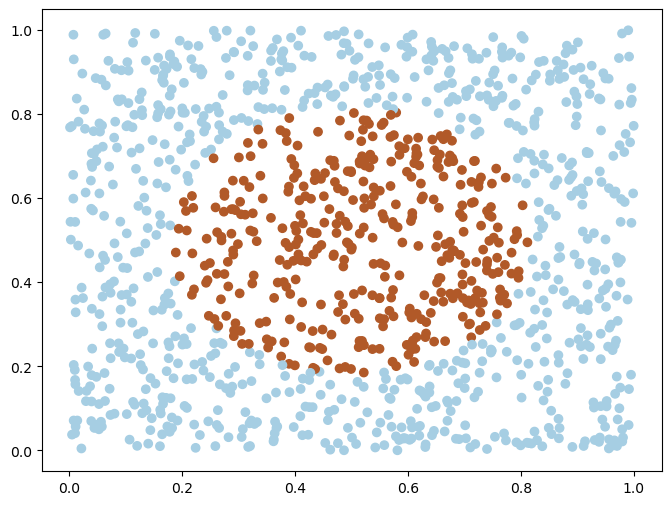

In [28]:
plt.figure (figsize=(8, 6))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired) 
plt.show()

In [29]:
def fit(model, X,Y, batch_size=100, train=True):    
      model.train(train)                                 
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 
       
      for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                          # поточний батч
        yb = Y[i: i+batch_size]                          # тензори поточного батчу
        y = model(xb)                                    # пряме розповсюдження
        L = loss(y, yb)                                  # похибка
        if train:                                        # в режимі навчання
            optimizer.zero_grad()                        # обнуляємо градієнти,        
            L.backward()                                 # обчислюємо градієнти,            
            optimizer.step()                             # підганяємо параметри
        sumL += L.item()                                 # сумарна похибка
        sumA += (y.round() == yb).float().mean()         # точність визначення окремого класу
         
        return sumL/numB,  sumA/numB   

In [30]:
model_1 = ThreeLayersNet(2, 5, 5, 1)        # створення екземпляру класу
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)

In [31]:
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model_1, X,Y) )  

epochs = 1000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model_1, X, Y)                               # по всьому датасету
    
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0540 accuracy: 0.0542
epoch:     0 loss: 0.0540 accuracy: 0.0542
epoch:   100 loss: 0.0540 accuracy: 0.0542
epoch:   200 loss: 0.0540 accuracy: 0.0542
epoch:   300 loss: 0.0540 accuracy: 0.0542
epoch:   400 loss: 0.0540 accuracy: 0.0542
epoch:   500 loss: 0.0540 accuracy: 0.0542
epoch:   600 loss: 0.0540 accuracy: 0.0542
epoch:   700 loss: 0.0540 accuracy: 0.0542
epoch:   800 loss: 0.0540 accuracy: 0.0542
epoch:   900 loss: 0.0540 accuracy: 0.0542
epoch:   999 loss: 0.0540 accuracy: 0.0542


In [32]:
print(model_1)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


In [33]:
dict(model_1.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[-0.6415,  0.3367],
         [ 0.0707, -0.1302],
         [-0.4999, -0.6643],
         [-0.2945, -0.0503],
         [ 0.1681, -0.3241]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([ 0.5042, -0.1376,  0.3633,  0.0774,  0.5452], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[-0.1147, -0.3335,  0.1694,  0.2021, -0.2103],
         [-0.1737, -0.4261,  0.0315,  0.2145,  0.0762],
         [ 0.3068, -0.0634, -0.4236, -0.4362, -0.4311],
         [ 0.0443, -0.2485,  0.4010, -0.4428,  0.1434],
         [ 0.3920,  0.2726, -0.0686, -0.2194,  0.2094]], requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([-0.2659,  0.0077,  0.2083,  0.3622, -0.3612], requires_grad=True),
 'fc3.weight': Parameter containing:
 tensor([[ 0.3050, -0.4396, -0.3564, -0.0372, -0.1356]], requires_grad=True),
 'fc3.bias': Parameter containing:
 tensor([-0.3497], requires_grad=True)}

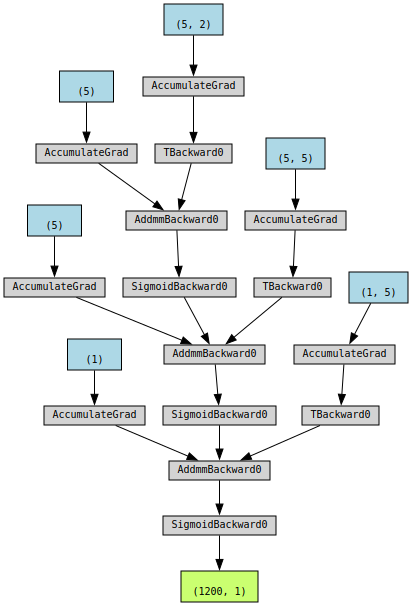

In [34]:
torchviz.make_dot(model_1(X), params = dict(model.named_parameters()))

In [35]:
model_2 = ThreeLayersNet(2, 5, 5, 1)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)

In [36]:
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model_2, X,Y) )
epochs = 1000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model_2, X, Y)                               # по всьому датасету
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0190 accuracy: 0.0542
epoch:     0 loss: 0.0190 accuracy: 0.0542
epoch:   100 loss: 0.0189 accuracy: 0.0542
epoch:   200 loss: 0.0189 accuracy: 0.0542
epoch:   300 loss: 0.0188 accuracy: 0.0542
epoch:   400 loss: 0.0187 accuracy: 0.0542
epoch:   500 loss: 0.0185 accuracy: 0.0542
epoch:   600 loss: 0.0183 accuracy: 0.0542
epoch:   700 loss: 0.0181 accuracy: 0.0542
epoch:   800 loss: 0.0179 accuracy: 0.0542
epoch:   900 loss: 0.0176 accuracy: 0.0542
epoch:   999 loss: 0.0174 accuracy: 0.0542


In [37]:
print(model_2)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


In [38]:
dict(model_2.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[-2.2101,  1.1945],
         [ 0.8975, -1.9267],
         [-2.3421,  0.1330],
         [ 0.2397,  2.1861],
         [-1.7172,  2.0842]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([-0.8332,  1.8939, -0.2098,  0.1571, -1.4648], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[ 1.1392, -1.6880,  1.8382, -0.4772,  1.5645],
         [ 2.0605, -1.5306,  2.0538, -1.9463,  1.7441],
         [-1.6330,  1.3867, -1.3587,  1.2137, -1.5140],
         [ 1.4938, -1.7149,  1.2338, -0.3548,  1.4450],
         [-0.3197,  0.3259, -0.9054,  0.4363, -0.5042]], requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([-1.2715, -0.2335,  0.6219, -1.3495, -0.1795], requires_grad=True),
 'fc3.weight': Parameter containing:
 tensor([[-1.4622, -1.2423,  1.4066, -1.4553, -0.1567]], requires_grad=True),
 'fc3.bias': Parameter containing:
 tensor([-0.9745], requires_grad=True)}

In [18]:
print("When using different loss functions and optimizers, we obtained approximately the same results.")

When using different loss functions and optimizers, we obtained approximately the same results.


In [21]:
!pip install torch

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 172.3/172.3 MB 1.6 MB/s eta 0:00:00
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=74ea7eb33a1259980d9bbb091279aa6df47bdd72d2e919ce21978bc6f6b969a0
  Stored in directory: c:\users\solov\appdata\local\pip\cache\wheels\29\65\6e\db2515eb1dc760fecd36b40d54df65c1e18534013f1c037e2e
Successfully built torchviz


In [22]:
!pip install torchviz